In [1]:
from __future__ import absolute_import, division, print_function, 
unicode_literals, unicode_literals

# tensorflow와 tf.keras를 import
import tensorflow as tf
from tensorflow import keras

# numpy와 matplotlib를 import
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [2]:
#데이터 로드 
fashion_mnist = keras.datasets.fashion_mnist
#훈련 및 검정으로 분할
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#28 x 28크기 numpy 배열 0`255 pixel
#0 - 9까지 labeling 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#훈련시킬 이미지의 갯수와 픽셀
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

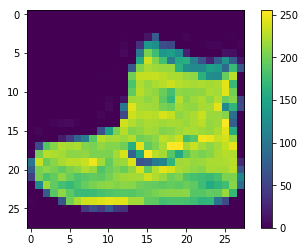

In [8]:
#전처리 과정
#첫 번째 이미지 픽셀 값이 0-255임을 확인
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#0-1값으로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

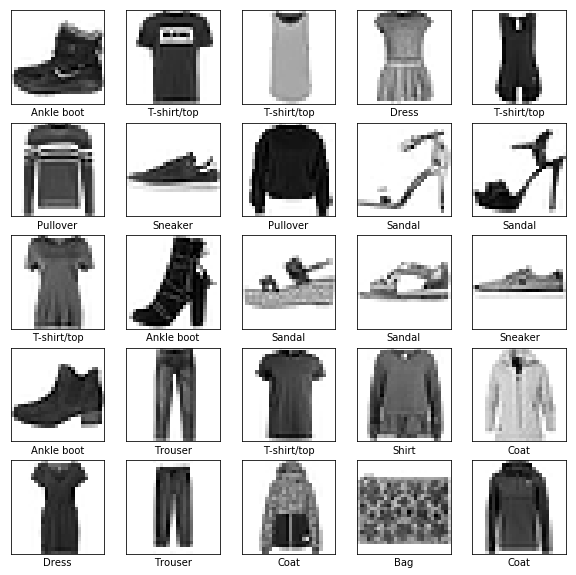

In [10]:
#25개의 분류범주
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#layer설정 
model = keras.Sequential([
    #1차원배열로 환산
    keras.layers.Flatten(input_shape=(28, 28)),
    #128개 노드
    keras.layers.Dense(128, activation='relu'),
    #10개 소프트맥스 노드 전체 1인 확률값 반환
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',#최적화 방법설정
              loss='sparse_categorical_crossentropy',#손실함수최소화목표
              metrics=['accuracy'])

In [13]:
#정확도 평가
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 31s 515us/sample - loss: 0.4921 - accuracy: 0.8280
Epoch 2/5
60000/60000 [==============================] - 27s 457us/sample - loss: 0.3756 - accuracy: 0.8634
Epoch 3/5
60000/60000 [==============================] - 25s 413us/sample - loss: 0.3380 - accuracy: 0.8781
Epoch 4/5
60000/60000 [==============================] - 23s 391us/sample - loss: 0.3138 - accuracy: 0.8852- loss:
Epoch 5/5
60000/60000 [==============================] - 23s 386us/sample - loss: 0.2972 - accuracy: 0.8893


In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)
#테스트 정확도가 트레인 정확도 보다 낮은 이유는 과적합으로 발생

10000/1 - 4s - loss: 0.2424 - accuracy: 0.8765

테스트 정확도: 0.8765


In [15]:
#첫번째 데이터 예측
predictions = model.predict(test_images)
predictions[0]

array([1.2764206e-06, 4.5596041e-10, 3.1666895e-07, 4.9323368e-10,
       4.8591062e-08, 3.6032225e-03, 1.2946259e-06, 1.7948138e-02,
       4.7941312e-06, 9.7844088e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])
#9번 레이블 예측됨

9

In [17]:
test_labels[0] #첫번째 데이터가 9번 앵클 부츠

9

In [25]:
#10개 클래스에 대한 예측을 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#444444")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('yellow')
  thisplot[true_label].set_color('blue')

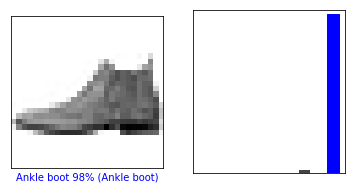

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()
#1번째 그림이 앵클부츠일 확률은 93%

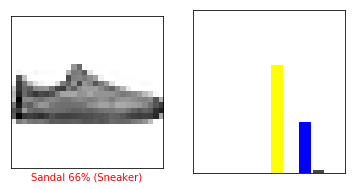

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()
#13번째 그림이 스니커즈일 확률이 46%
#즉 파란색이 올바르게 예측할 확률이며 확률이 높다고 하더라도 예측이 틀릴 수 있음
#결과로 잘못 예측한 것을 알 수 있음

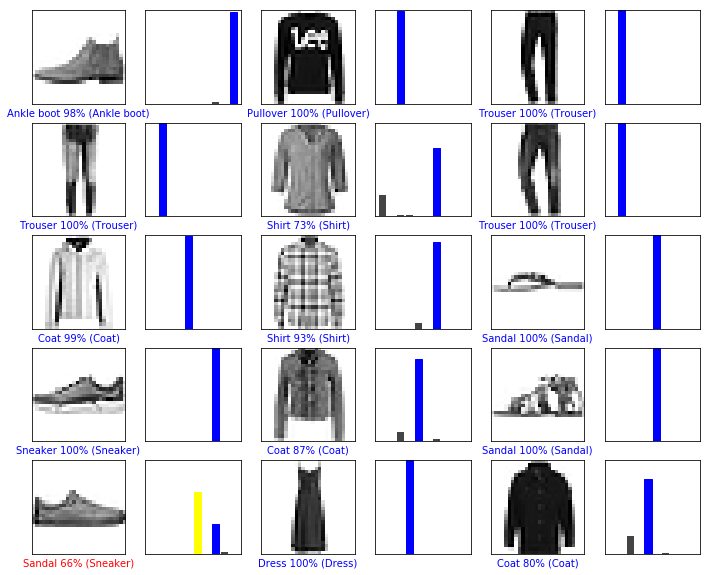

In [28]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 노란색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
#23번째를 제대로 예측하지 못함

In [22]:
# 테스트 세트에서 이미지 하나를 선택합니다
# 이미지 하나만 사용할 때도 배치에 추가합니다(2차원 배열)
img = test_images[0]
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2764206e-06 4.5596041e-10 3.1666926e-07 4.9323368e-10 4.8591151e-08
  3.6032225e-03 1.2946259e-06 1.7948143e-02 4.7941262e-06 9.7844088e-01]]


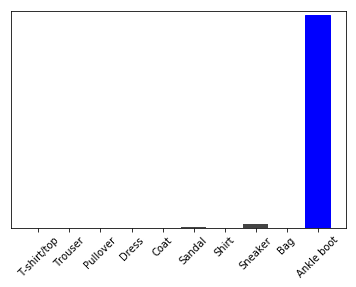

In [31]:
#첫번째 데이터가 앵클 부츠임을 예측함
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)